# Redes Neurais

Redes neurais são modelos computacionais inspirados no cérebro humano, usados em aprendizado de máquina e inteligência artificial. Elas consistem em camadas de neurônios conectados, onde cada conexão tem um peso ajustável. A camada de entrada recebe dados, camadas ocultas processam esses dados e a camada de saída produz o resultado final. Cada neurônio aplica uma função de ativação para transformar suas entradas em saídas. Redes neurais são particularmente eficazes em tarefas como reconhecimento de imagem, processamento de linguagem natural e previsão de séries temporais, graças à sua capacidade de aprender e modelar relacionamentos complexos nos dados.

**Objetivo:** Seu modelo deve prever a MEDV (Valor da Mediana de ocupação das casas). Utilize um modelo de rede neural!


**Dicionário de dados:**

- CRIM - taxa de criminalidade per capita por cidade
- ZN - proporção de terrenos residenciais zoneados para lotes acima de 25.000 pés quadrados
- INDUS - proporção de acres de negócios não varejistas por cidade
- CHAS - variável fictícia do Rio Charles (1 se o lote faz divisa com o rio; 0 caso contrário)
- NOX - concentração de óxidos de nitrogênio (partes por 10 milhões)
- RM - número médio de quartos por habitação
- AGE - proporção de unidades ocupadas por proprietários construídas antes de 1940
- DIS - distâncias ponderadas para cinco centros de emprego de Boston
- RAD - índice de acessibilidade a rodovias radiais
- TAX - taxa de imposto sobre propriedade de valor total por 10.000
- PTRATIO - relação aluno-professor por cidade
- B - 1000(Bk - 0,63)^2 onde Bk é a proporção de negros por cidade
- LSTAT - % de população de status socioeconômico inferior
- MEDV - valor mediano das casas ocupadas por proprietários em milhares de dólares

>**Fonte de Dados e dicionário:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

>**Referências:** Formação Cientista de Dados (https://www.datascienceacademy.com.br/)

In [11]:
# Configurações de saídas
options(scipen = 999, digits = 2, repos = 'http://cran.rstudio.com/', repr.plot.width = 20, repr.plot.height = 10)

In [ ]:
# Instalando os pacotes necessários
if(!require(pacman)) install.packages('pacman')
library('pacman')
pacman::p_load(dplyr, ggplot2, ggthemes, corrplot, caret, neuralnet)

In [12]:
# Importando o conjunto de dados
df <- read.csv('/content/Boston.csv', sep = ',')

In [13]:
# Visualizando as primeiras linhas
head(df)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0063,18,2.3,0,0.54,6.6,65,4.1,1,296,15,397,5.0,24
2,0.0273,0,7.1,0,0.47,6.4,79,5.0,2,242,18,397,9.1,22
3,0.0273,0,7.1,0,0.47,7.2,61,5.0,2,242,18,393,4.0,35
4,0.0324,0,2.2,0,0.46,7.0,46,6.1,3,222,19,395,2.9,33
5,0.0691,0,2.2,0,0.46,7.1,54,6.1,3,222,19,397,5.3,36
6,0.0299,0,2.2,0,0.46,6.4,59,6.1,3,222,19,394,5.2,29


In [14]:
# Visualizando os tipos de dados
str(df)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : int  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [15]:
# Verificando o sumário das variáveis
summary(df)

      crim          zn          indus           chas           nox      
 Min.   : 0   Min.   :  0   Min.   : 0.5   Min.   :0.00   Min.   :0.38  
 1st Qu.: 0   1st Qu.:  0   1st Qu.: 5.2   1st Qu.:0.00   1st Qu.:0.45  
 Median : 0   Median :  0   Median : 9.7   Median :0.00   Median :0.54  
 Mean   : 4   Mean   : 11   Mean   :11.1   Mean   :0.07   Mean   :0.55  
 3rd Qu.: 4   3rd Qu.: 12   3rd Qu.:18.1   3rd Qu.:0.00   3rd Qu.:0.62  
 Max.   :89   Max.   :100   Max.   :27.7   Max.   :1.00   Max.   :0.87  
       rm           age           dis            rad            tax     
 Min.   :3.6   Min.   :  3   Min.   : 1.1   Min.   : 1.0   Min.   :187  
 1st Qu.:5.9   1st Qu.: 45   1st Qu.: 2.1   1st Qu.: 4.0   1st Qu.:279  
 Median :6.2   Median : 78   Median : 3.2   Median : 5.0   Median :330  
 Mean   :6.3   Mean   : 69   Mean   : 3.8   Mean   : 9.5   Mean   :408  
 3rd Qu.:6.6   3rd Qu.: 94   3rd Qu.: 5.2   3rd Qu.:24.0   3rd Qu.:666  
 Max.   :8.8   Max.   :100   Max.   :12.1   Max.   

In [16]:
# Verificando valores ausentes
sum(is.na(df))

[1] 0

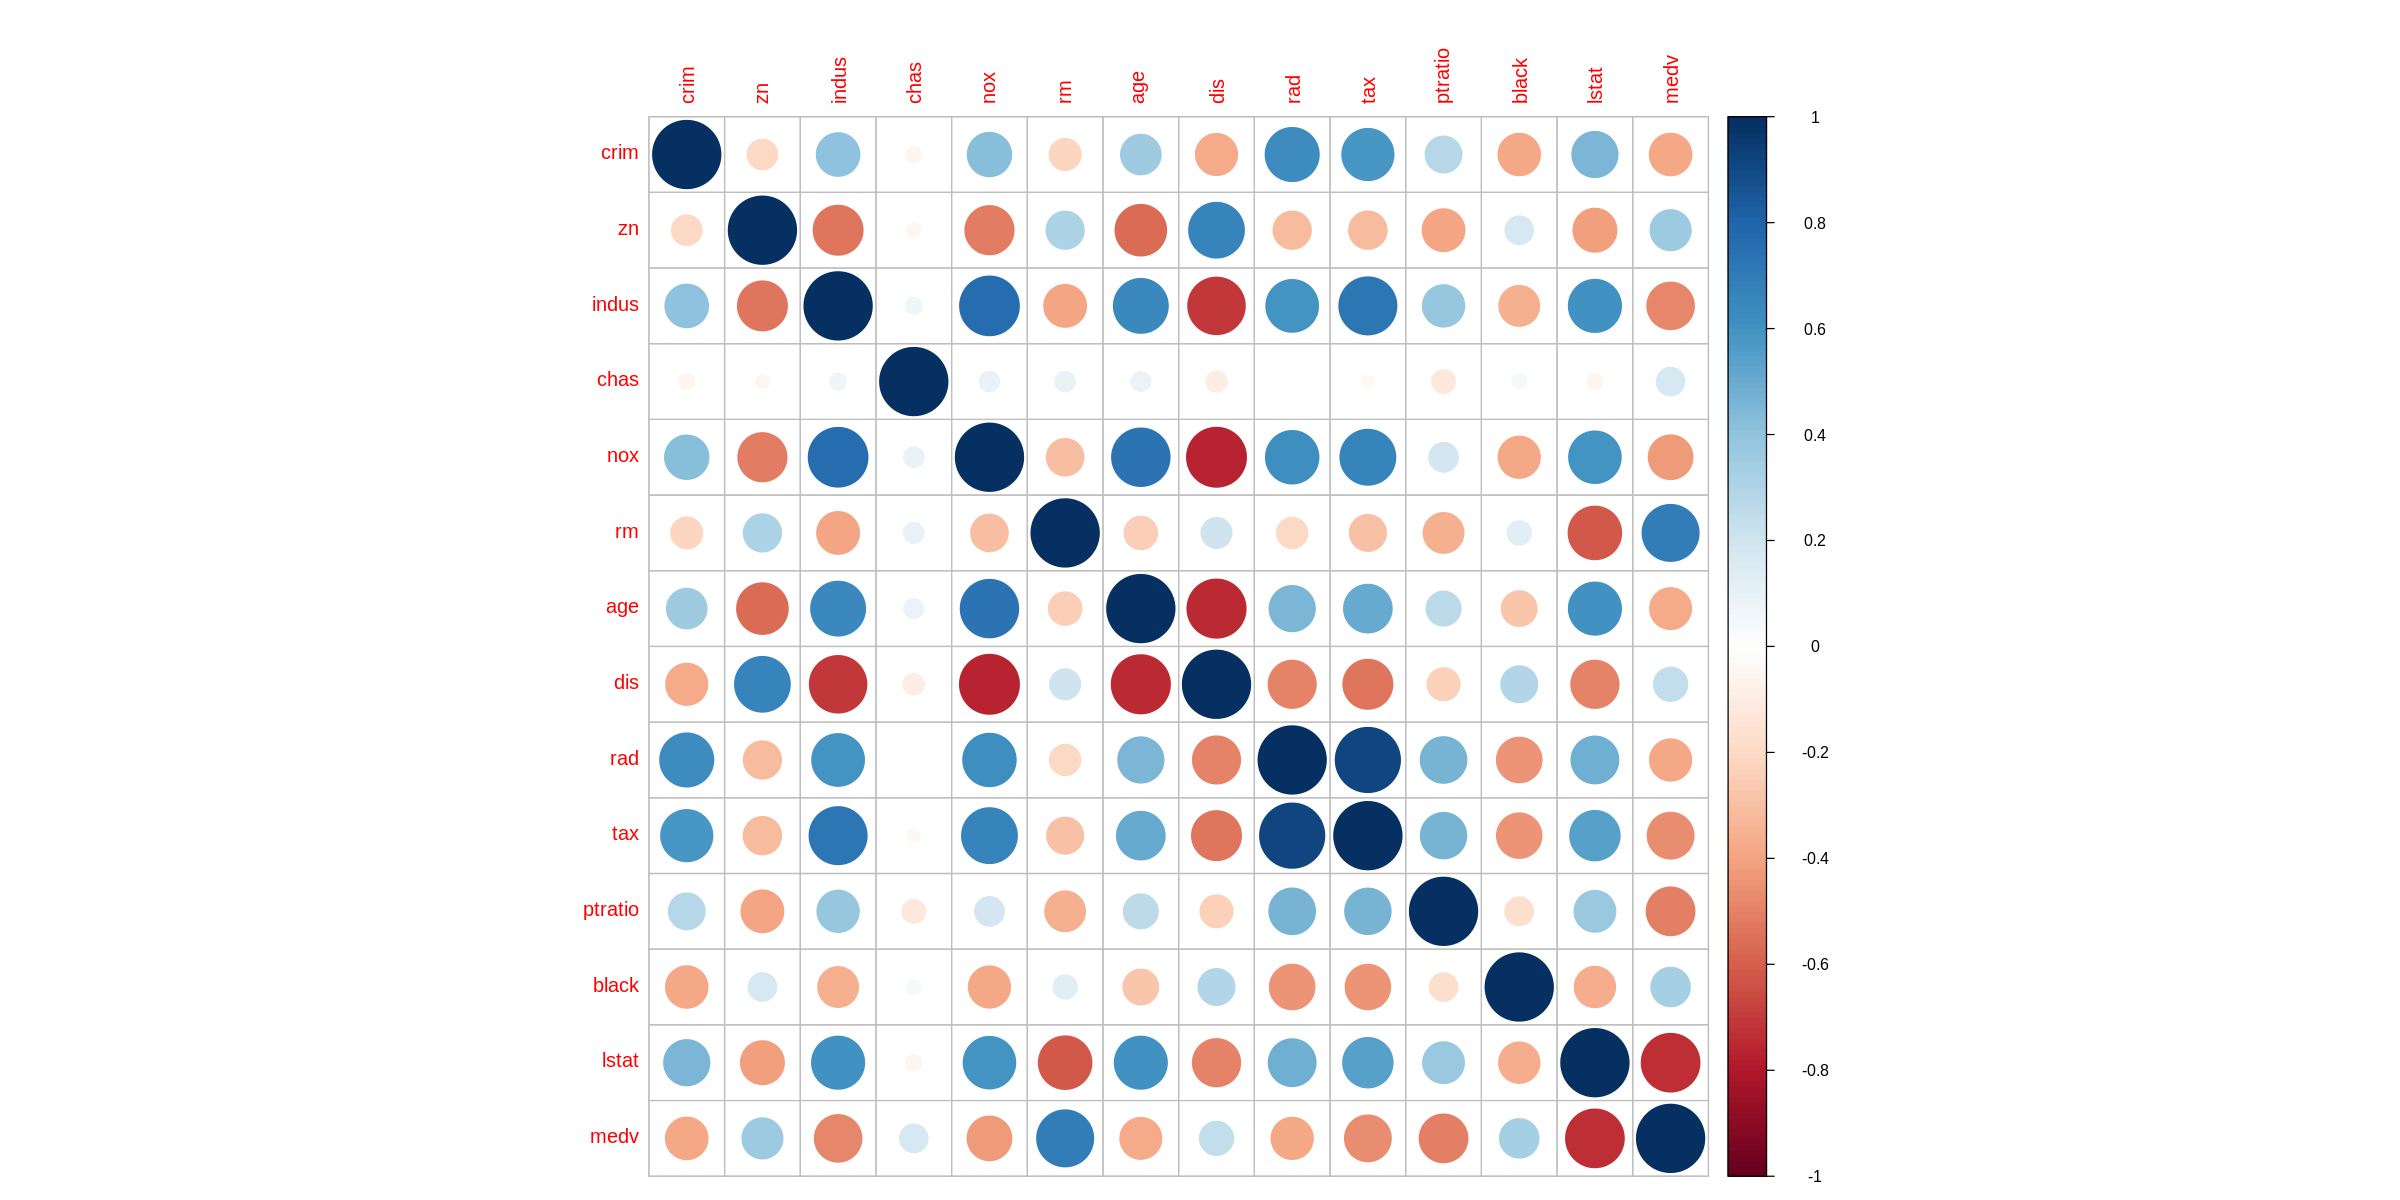

In [17]:
# Analisando as colunas numéricas e correlações
variaveis_numericas <- sapply(df, is.numeric)

# Analisando as correlações entre as variáveis
cor_var_numericas <- cor(df[,variaveis_numericas])
corrplot(cor_var_numericas, method = 'circle')

In [75]:
# Definindo os máximos e mínimos do conjunto de dados
mins <- apply(df, 2, min)
maxs <- apply(df, 2, max)

# Normalizando
df_normalizado <- as.data.frame(scale(df, center = mins, scale = maxs - mins))
head(df_normalizado)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00000,0.18,0.068,0,0.31,0.58,0.64,0.27,0.000,0.208,0.29,1.00,0.090,0.42
2,0.00024,0.00,0.242,0,0.17,0.55,0.78,0.35,0.043,0.105,0.55,1.00,0.204,0.37
3,0.00024,0.00,0.242,0,0.17,0.69,0.60,0.35,0.043,0.105,0.55,0.99,0.063,0.66
4,0.00029,0.00,0.063,0,0.15,0.66,0.44,0.45,0.087,0.067,0.65,0.99,0.033,0.63
5,0.00071,0.00,0.063,0,0.15,0.69,0.53,0.45,0.087,0.067,0.65,1.00,0.099,0.69
6,0.00026,0.00,0.063,0,0.15,0.55,0.57,0.45,0.087,0.067,0.65,0.99,0.096,0.53


In [79]:
# Criando a divisão do conjunto de dados (70% treino e 30% teste)
indice <- caret::createDataPartition(df_normalizado$medv, p = 0.7, list = FALSE)
treino <- df_normalizado[indice,]
teste <- df_normalizado[-indice,]

In [80]:
# Verificando as dimensões
dim(treino)
dim(teste)

[1] 356  14

[1] 150  14

In [81]:
head(treino)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00000,0.18,0.068,0,0.31,0.58,0.64,0.27,0.000,0.208,0.29,1.00,0.090,0.42
2,0.00024,0.00,0.242,0,0.17,0.55,0.78,0.35,0.043,0.105,0.55,1.00,0.204,0.37
3,0.00024,0.00,0.242,0,0.17,0.69,0.60,0.35,0.043,0.105,0.55,0.99,0.063,0.66
5,0.00071,0.00,0.063,0,0.15,0.69,0.53,0.45,0.087,0.067,0.65,1.00,0.099,0.69
6,0.00026,0.00,0.063,0,0.15,0.55,0.57,0.45,0.087,0.067,0.65,0.99,0.096,0.53
7,0.00092,0.12,0.272,0,0.29,0.47,0.66,0.40,0.174,0.237,0.28,1.00,0.295,0.40


In [82]:
# Criando os modelos de Regressão com Redes Neurais
modelo_v1 <- neuralnet(medv ~ ., data = treino, hidden = c(5,3), linear.output = TRUE)

In [83]:
# Plotagem do gráfico
plot(modelo_v1)

In [98]:
# Previsões com dados de teste
rede_neural_previsoes <- compute(modelo_v1, teste[1:13])

In [99]:
# Visualizando a estrutura dos dados da previsão
str(rede_neural_previsoes)

List of 2
 $ neurons   :List of 3
  ..$ : num [1:150, 1:14] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:150] "4" "8" "10" "12" ...
  .. .. ..$ : chr [1:14] "" "crim" "zn" "indus" ...
  ..$ : num [1:150, 1:6] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:150] "4" "8" "10" "12" ...
  .. .. ..$ : NULL
  ..$ : num [1:150, 1:4] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:150] "4" "8" "10" "12" ...
  .. .. ..$ : NULL
 $ net.result: num [1:150, 1] 0.645 0.28 0.293 0.318 0.293 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:150] "4" "8" "10" "12" ...
  .. ..$ : NULL


In [101]:
# Retomando os dados normalizados para a escala original
previsoes <- rede_neural_previsoes$net.result * (max(df$medv) - min(df$medv)) + min(df$medv)
head(previsoes)

4,34
8,18
10,18
12,19
15,18
18,17


In [104]:
# Retomando os dados de teste para o valor padrão
teste_convert <- (teste$medv) * (max(df$medv) - min(df$medv)) + min(df$medv)
head(teste_convert)

[1] 33 27 19 19 18 18

In [106]:
# Mean Squared Error
MSE <- sum((teste_convert - previsoes)^2)/nrow(teste)
MSE

[1] 20

In [107]:
# Obtendo os erros das previsões
error.df <- data.frame(teste_convert, previsoes)
colnames(error.df) <- c('teste_real','previsoes')
head(error.df)

,teste_real,previsoes
,<dbl>,<dbl>
4,33,34
8,27,18
10,19,18
12,19,19
15,18,18
18,18,17


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


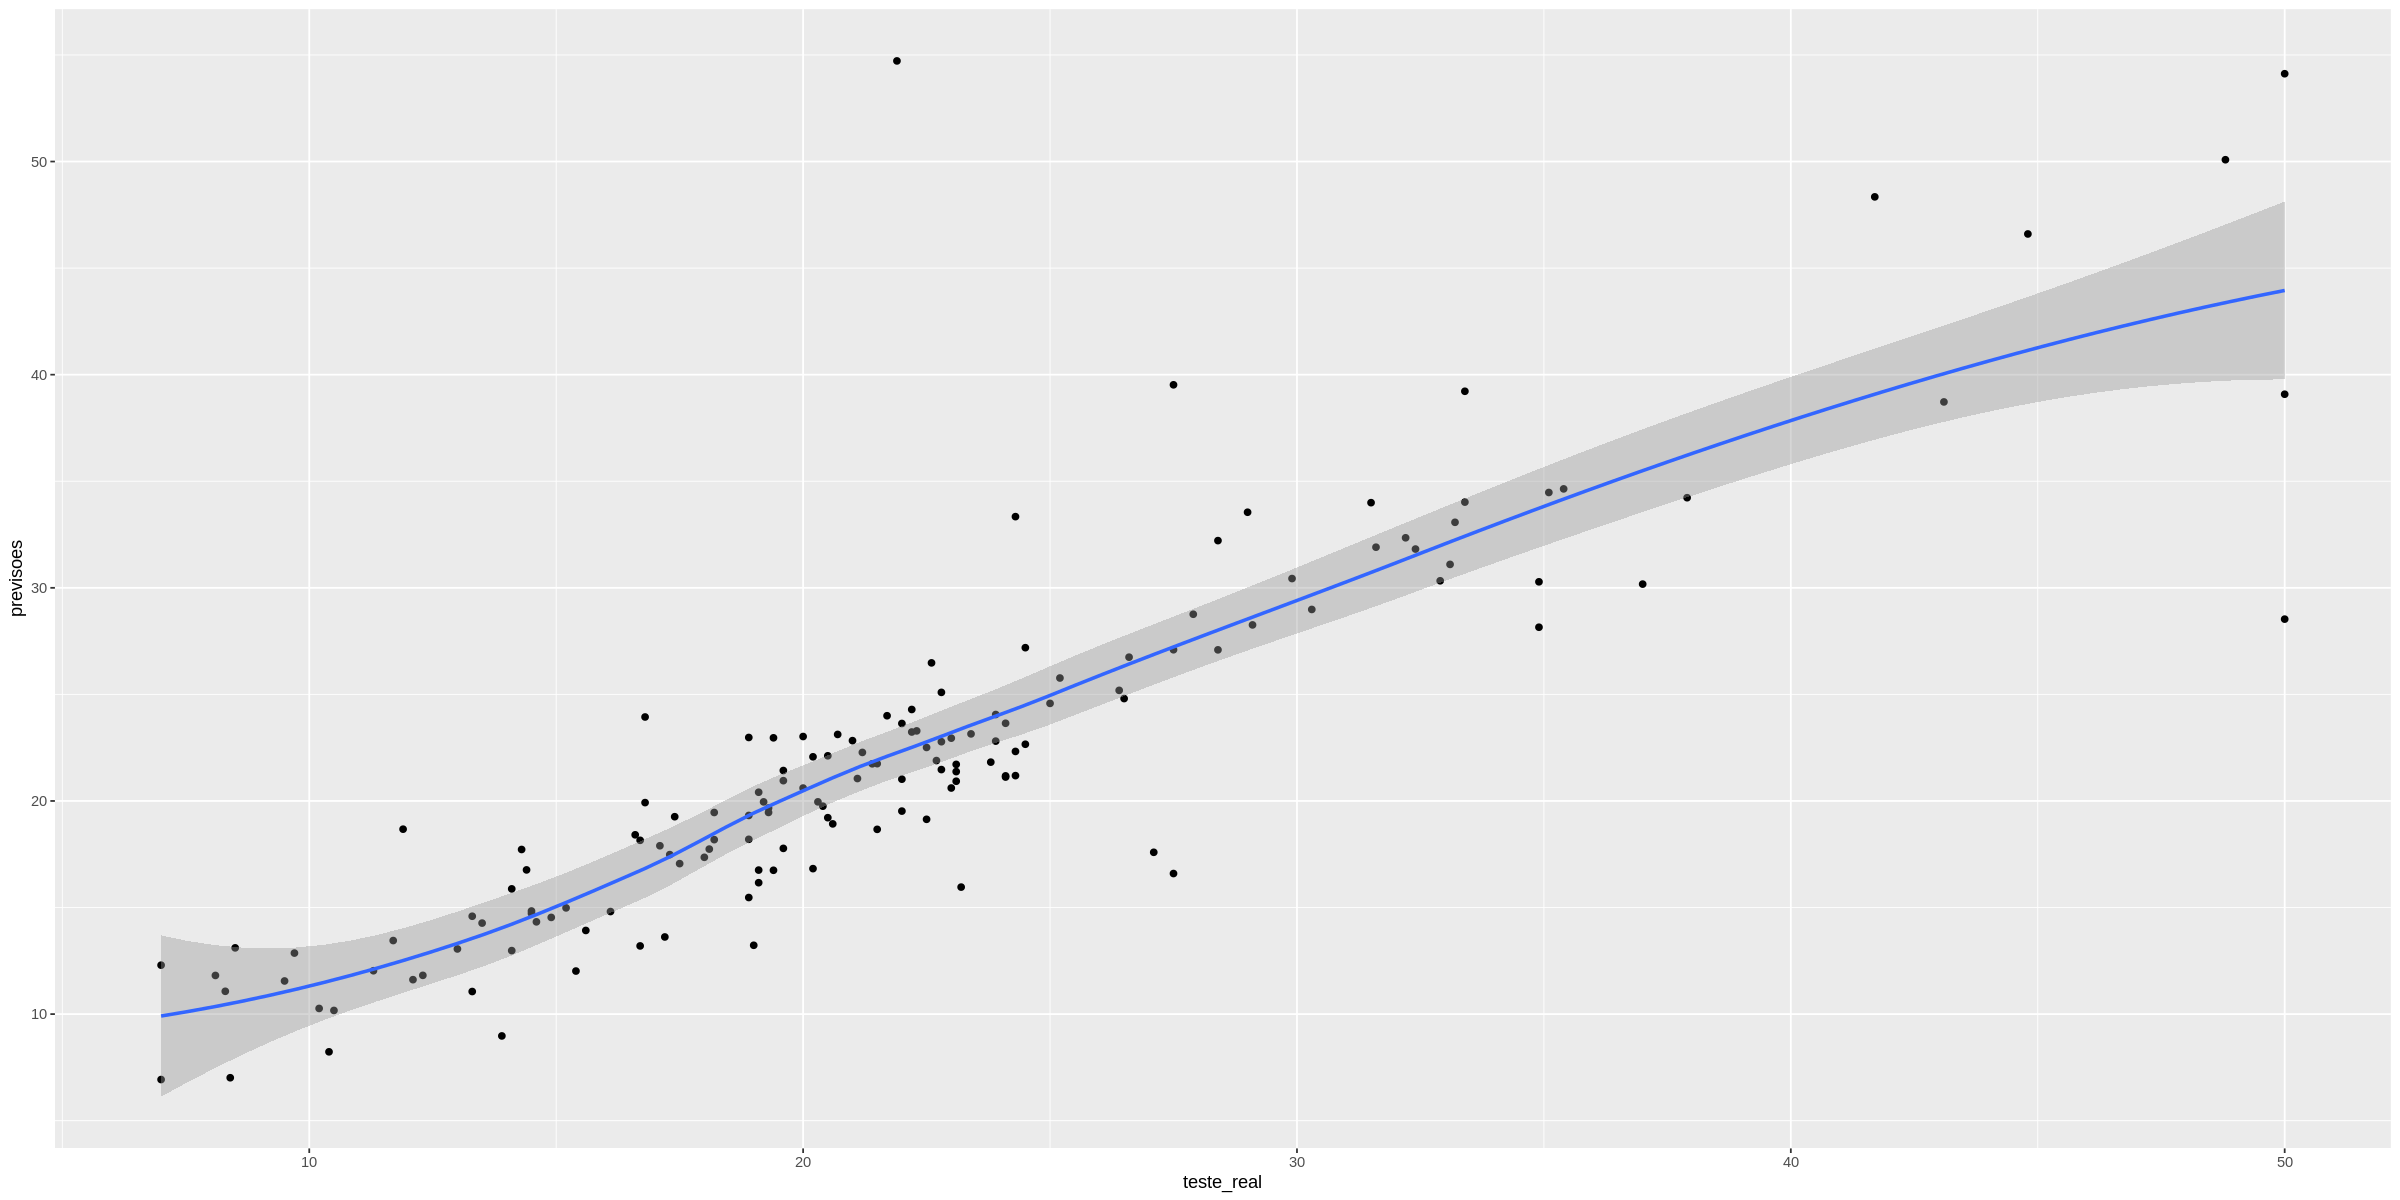

In [108]:
# Visualizando o plot
ggplot(error.df, aes(x=teste_real, y=previsoes))+
  geom_point() + stat_smooth()